Importere nøvendige pakker til analyse af lyd med `FFT`

In [1]:
from os.path import join as pjoin

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

Her definere man funktionen til at hente lyd data

In [2]:
def process_audio(audio_file_path):
    sample_rate, audio_data = wavfile.read(audio_file_path)
    audio_duration = len(audio_data) / sample_rate
    return audio_data, sample_rate, audio_duration

Her definere man stien til lydfilen, og bruger `process_audio` funktionen til at give os sampling rate, lyddataen og længden på lyden

In [8]:
file_name = "rev_b_12_8192.wav"
audio_data, sample_rate, audio_duration = process_audio(pjoin("../data/trimmed/", file_name))
print(f"{file_name}:\n Duration: {audio_duration}s\n Number of samples: {len(audio_data)}\n Sample rate: {sample_rate/1000}kHz")

rev_b_12_8192.wav:
 Duration: 0.18575963718820862s
 Number of samples: 8192
 Sample rate: 44.1kHz


Her definere man funktionen `plot_fft` som der laver en FFT på vores data med numpy's FFT funktion, og derefter laver en graf med det

In [9]:
def plot_fft(audio_data, sample_rate, file_name):
    # Køre fft på lyd
    n = len(audio_data)
    fft_result = np.fft.fft(audio_data)
    frequenzy = np.fft.fftfreq(n, 1 / sample_rate)
    # Laver plot med matplot lib
    plt.figure(figsize=(12, 6))
    plt.title(file_name)
    plt.xlabel("Frekvens [Hz]")
    plt.ylabel("Amplitude")
    plt.xlim(0, 1000)
    plt.xticks(np.arange(0, 1000, step=25), rotation=60)
    plt.plot(frequenzy[:n], np.abs(fft_result[:n]))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, axis='both')

    plt.show()

Her køre man `plot_fft` med vores lyddata

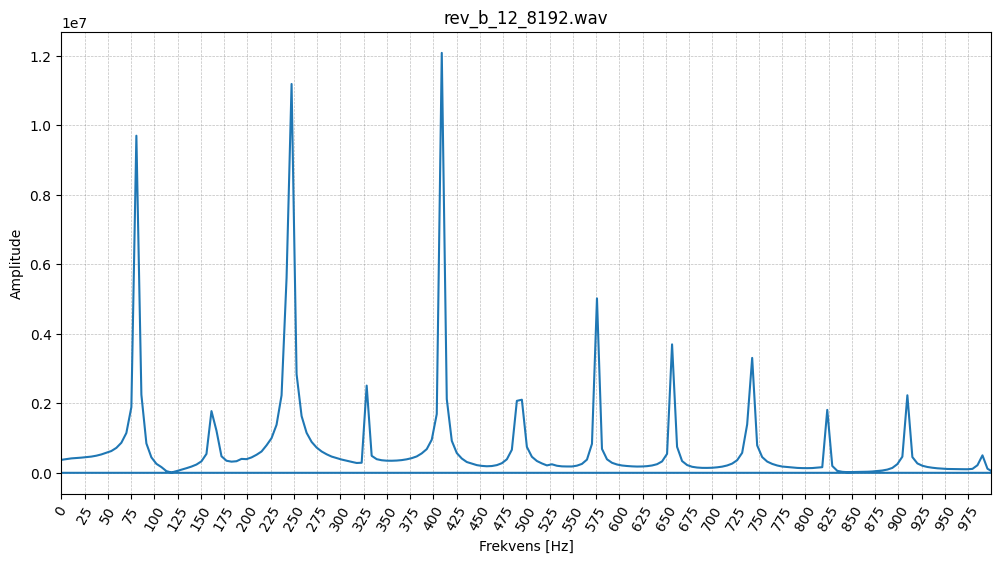

In [10]:
plot_fft(audio_data, sample_rate, file_name)